In [76]:
!pip -q install apyori

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

plt.rcParams['figure.figsize']=(15,10)

In [78]:
url = r'db/vendas_supermercado.csv'
data = pd.read_csv(url)

In [79]:
data.head()

,Produto,Quantidade,Preço Unitário,Total,Linha de Produto,Tipo de Cliente,Gênero,Cidade
0,Arroz; Feijão,3.0,NaN,129.355345,Higiene,VIP,Outro,Rio de Janeiro
1,Legumes,2.0,31.608294,63.216588,Bebidas,VIP,Outro,Curitiba
2,Óleo,NaN,8.307902,49.847411,Limpeza,Regular,Feminino,Rio de Janeiro
3,Macarrão,2.0,32.386268,64.772537,Bebidas,Regular,Feminino,Porto Alegre
4,Pão,5.0,3.242670,16.213348,Alimentos,Regular,Outro,São Paulo


### Remover os espaços em branco das colunas

In [80]:
for index in data.columns:
    # Verifica se a coluna é do tipo String
    if data[index].dtype == 'object':
        data[index] = data[index].str.strip()

### Verificar os valores nulos em todo dataset

In [81]:
nulos = data.isnull().sum()

# Exibir as colunas com valores nulos
print(f'Valores nulos em cada coluna: \n\n{nulos[nulos > 0]}')

Valores nulos em cada coluna: 

Produto           1571
Quantidade        1616
Preço Unitário    1640
dtype: int64


### Verificar quantos produtos distintos existem na coluna produtos

In [82]:
if 'Produto' in data.columns:
    itens = data['Produto'].dropna().sort_values()
    print(f'\nExistem {itens.nunique()} produtos distintos:\n\n {itens.unique()}')
else:
    print('A coluna Produto não foi encontrada!!')


Existem 11 produtos distintos:

 ['Arroz' 'Arroz; Feijão' 'Açúcar' 'Feijão' 'Fruta' 'Legumes' 'Leite'
 'Macarrão' 'Pão' 'Sal' 'Óleo']


### Checar a duplicidade de valores

In [83]:
print('Checando duplicidade de valores')
print(data.duplicated().value_counts())

Checando duplicidade de valores
False    8000
True      100
Name: count, dtype: int64


### Buscar os itens mais vendidos

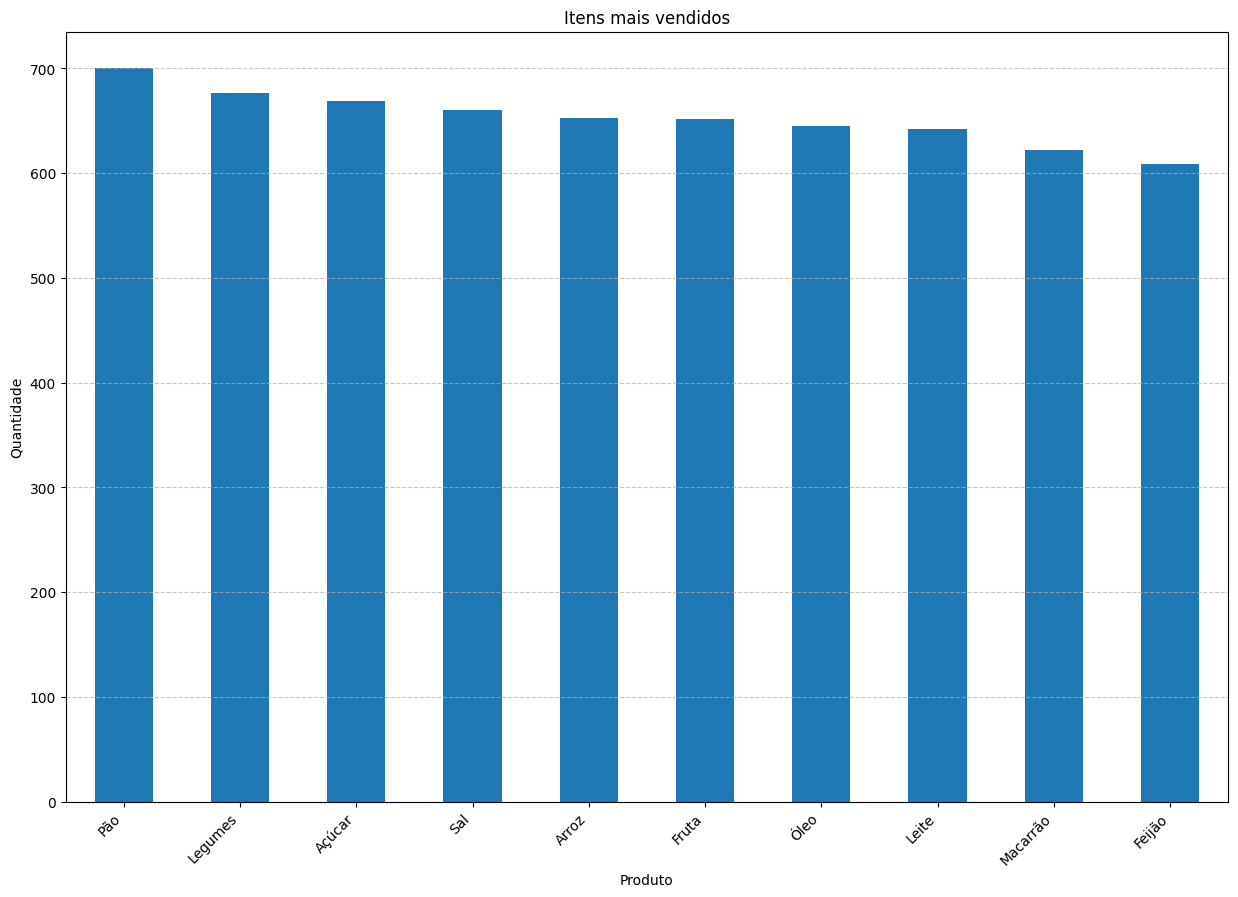

In [84]:
qtd_itens = itens.value_counts()

qtd_itens.nlargest(10).plot(kind='bar')

# Rotular o Gráfico

plt.title('Itens mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Buscar os itens menos vendidos

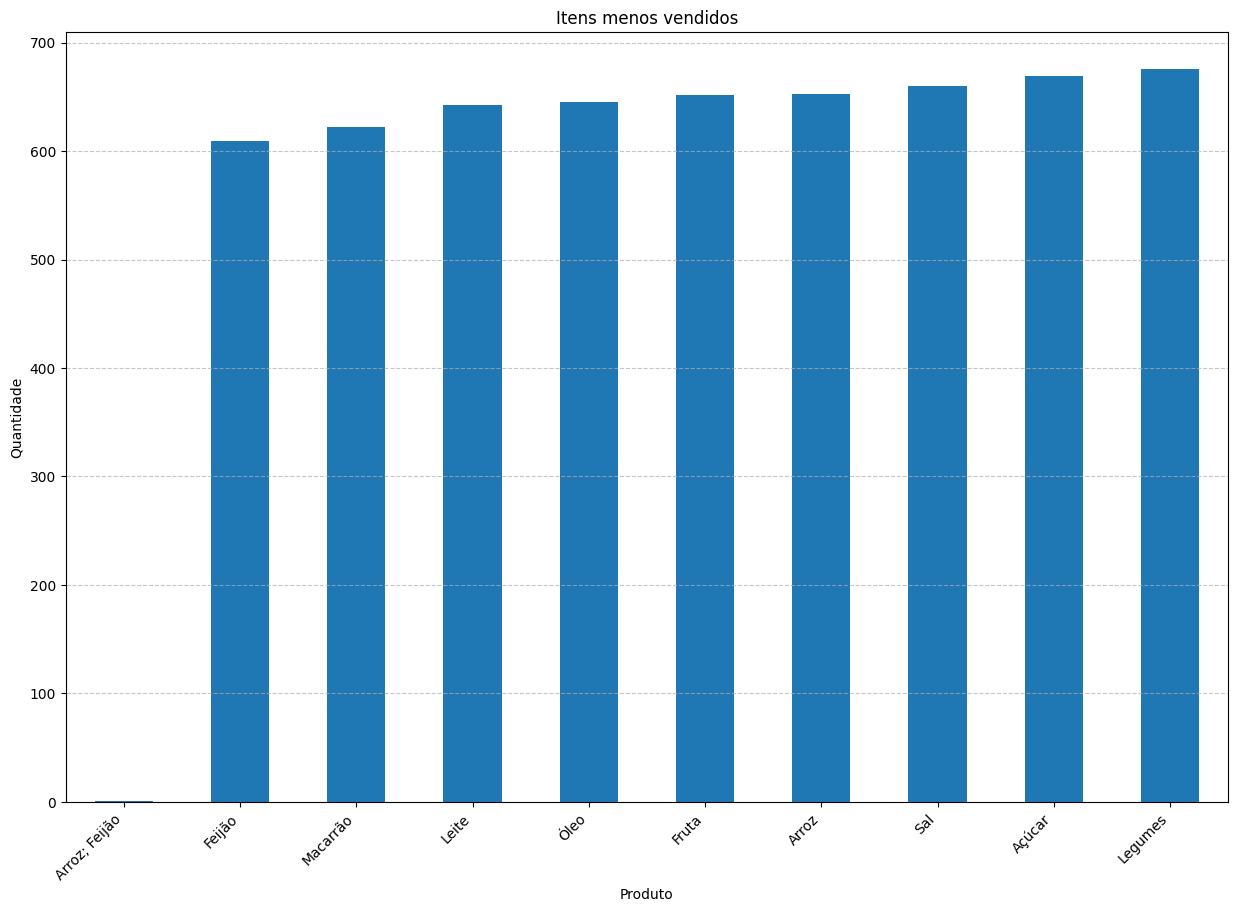

In [85]:
qtd_itens = itens.value_counts()

qtd_itens.nsmallest(10).plot(kind='bar')

# Rotular o Gráfico

plt.title('Itens menos vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Agrupar os itens comprados por cestas

In [86]:
qtd_por_cesta = data.notna().apply(sum, axis=1)

print()

# Filtrar cestas com mais de um item
cestas = [
    sorted(set(linha['Produto'].split(';'))) # Converte os valores em strings
    for index, linha in data.iterrows() if pd.notna(linha['Produto']) # Filtra linhas com mais de um item
]

#print(cestas)

# Exibir as primeiras 5 cestas

for i, cesta in enumerate(cestas[:5], 1):
    produtos = ', '.join(cesta) # Junta os produtos em uma string
    print(f'Cestas{i}: {produtos}')


Cestas1:  Feijão, Arroz
Cestas2: Legumes
Cestas3: Óleo
Cestas4: Macarrão
Cestas5: Pão
